In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #### shuffling is defult ### 
import matplotlib.patches as mpatches ### will be used for legend labeling ### 

In [2]:
#                         #####  Preprocessing   #####
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.20) 


_3d_data_set = np.load('Datasets/Indian Pines/indianpinearray.npy') 
# print(_3d_data_set[:,:,1]) 
ground_truth = np.load('Datasets/Indian Pines/IPgt.npy') 
data_set = np.reshape(_3d_data_set,(145*145,200)) 
print(np.shape(ground_truth))
ground_truth = np.reshape(ground_truth,(145*145))
X_train, X_test, y_train, y_test = train_test_split(data_set, ground_truth, test_size=0.30) 
###### scale and choose number of features for best accuracy ##### 
###### scale and choose number of features for best accuracy ##### 
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))


(145, 145)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
X_reduced.shape

(14717, 200)

In [10]:
X_train.shape

(14717, 200)

In [7]:
n , num_features = np.shape(X_reduced) 
print(n)
print(np.shape(X_train))
# 10 folds for validation 
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

#### the first mse value is for no pc in regression ##### 
mse_calibration = np.ones(num_features + 1 ) 
mse_validation = np.ones(num_features + 1 ) 

14717
(14717, 200)


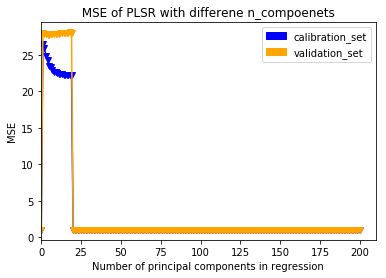

In [24]:
%%capture --no-display
# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Calculate MSE using CV for the ## principle components, adding one component at the time.
for i in np.arange(1, 20): 
    pls = PLSRegression(n_components=i)
        ##### training ####
    mse_calibration[i] =  -1*model_selection.cross_val_score(pls, scale(X_train), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
      #### validating ##### 
    mse_validation[i] = -1*model_selection.cross_val_score(pls, X_test, y_test.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    

plt.plot(np.array(mse_calibration), '-v' , color = 'blue') 
plt.plot(np.array(mse_validation), '-v' , color = 'orange')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title(' MSE of PLSR with differene n_compoenets ')
plt.xlim(xmin=-0.2); 
red_patch = mpatches.Patch(color='orange', label='validation_set') 
blue_patch = mpatches.Patch(color='blue', label='calibration_set')
plt.legend(handles=[blue_patch , red_patch]) 
print(' mse_calibration = ' , mse_calibration) 
print('  mse_validation = ' , mse_validation)

In [28]:
print(' mse_calibration = ' , np.mean(mse_calibration)) 
print('  mse_validation = ' , (mse_validation))

 mse_calibration =  3.0942986949877436
  mse_validation =  [ 1.         27.95903758 27.93426819 27.82526048 27.77109611 27.78999172
 27.84071465 27.90316833 27.92803511 27.91700318 27.87903486 27.9083326
 27.96000784 28.04375174 28.00382655 28.02869895 28.04762639 28.08563351
 28.12632643 28.07768521  1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.    

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 170)
principalComponents = pca.fit_transform(X_train)

In [19]:
# optimal_n = np.argmin(mse_validation) 
pls = PLSRegression(n_components =170)
pls.fit(scale(principalComponents), y_train)
principalComponents_test = pca.fit_transform(scale(X_test))
mean_squared_error(y_test, pls.predict(principalComponents_test))  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint16 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


2196.5093123744714

In [21]:
y_pred = pls.predict(principalComponents_test)